# Weighted ECM clustering vs Traditional ECM clustering
## LettersIJL dataset

In [4]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
from evclust.ecm import ecm
from evclust.wecm_new import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, calculate_non_specificity, plotting
import pandas as pd
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_letters


     A    B    C    D    E    F    G    H    I     J    K    L    M    N    O  \
0  3.0  7.0  3.0  5.0  1.0  1.0  1.0  5.0  5.0   0.0  1.0  6.0  0.0  8.0  0.0   
1  3.0  4.0  4.0  7.0  1.0  0.0  1.0  6.0  6.0   0.0  0.0  6.0  0.0  8.0  0.0   
2  0.0  0.0  0.0  1.0  0.0  7.0  7.0  4.0  4.0   7.0  6.0  8.0  0.0  8.0  0.0   
3  1.0  4.0  2.0  3.0  1.0  9.0  6.0  2.0  6.0  12.0  4.0  9.0  1.0  7.0  1.0   
4  1.0  7.0  0.0  4.0  0.0  7.0  7.0  4.0  4.0   7.0  6.0  8.0  0.0  8.0  0.0   

     P  
0  8.0  
1  8.0  
2  8.0  
3  7.0  
4  8.0  


D:\vtdo\projects\evclust\src\evclust\utils.py:1085: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], alpha=0.5, c=colors[i], marker=marker_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


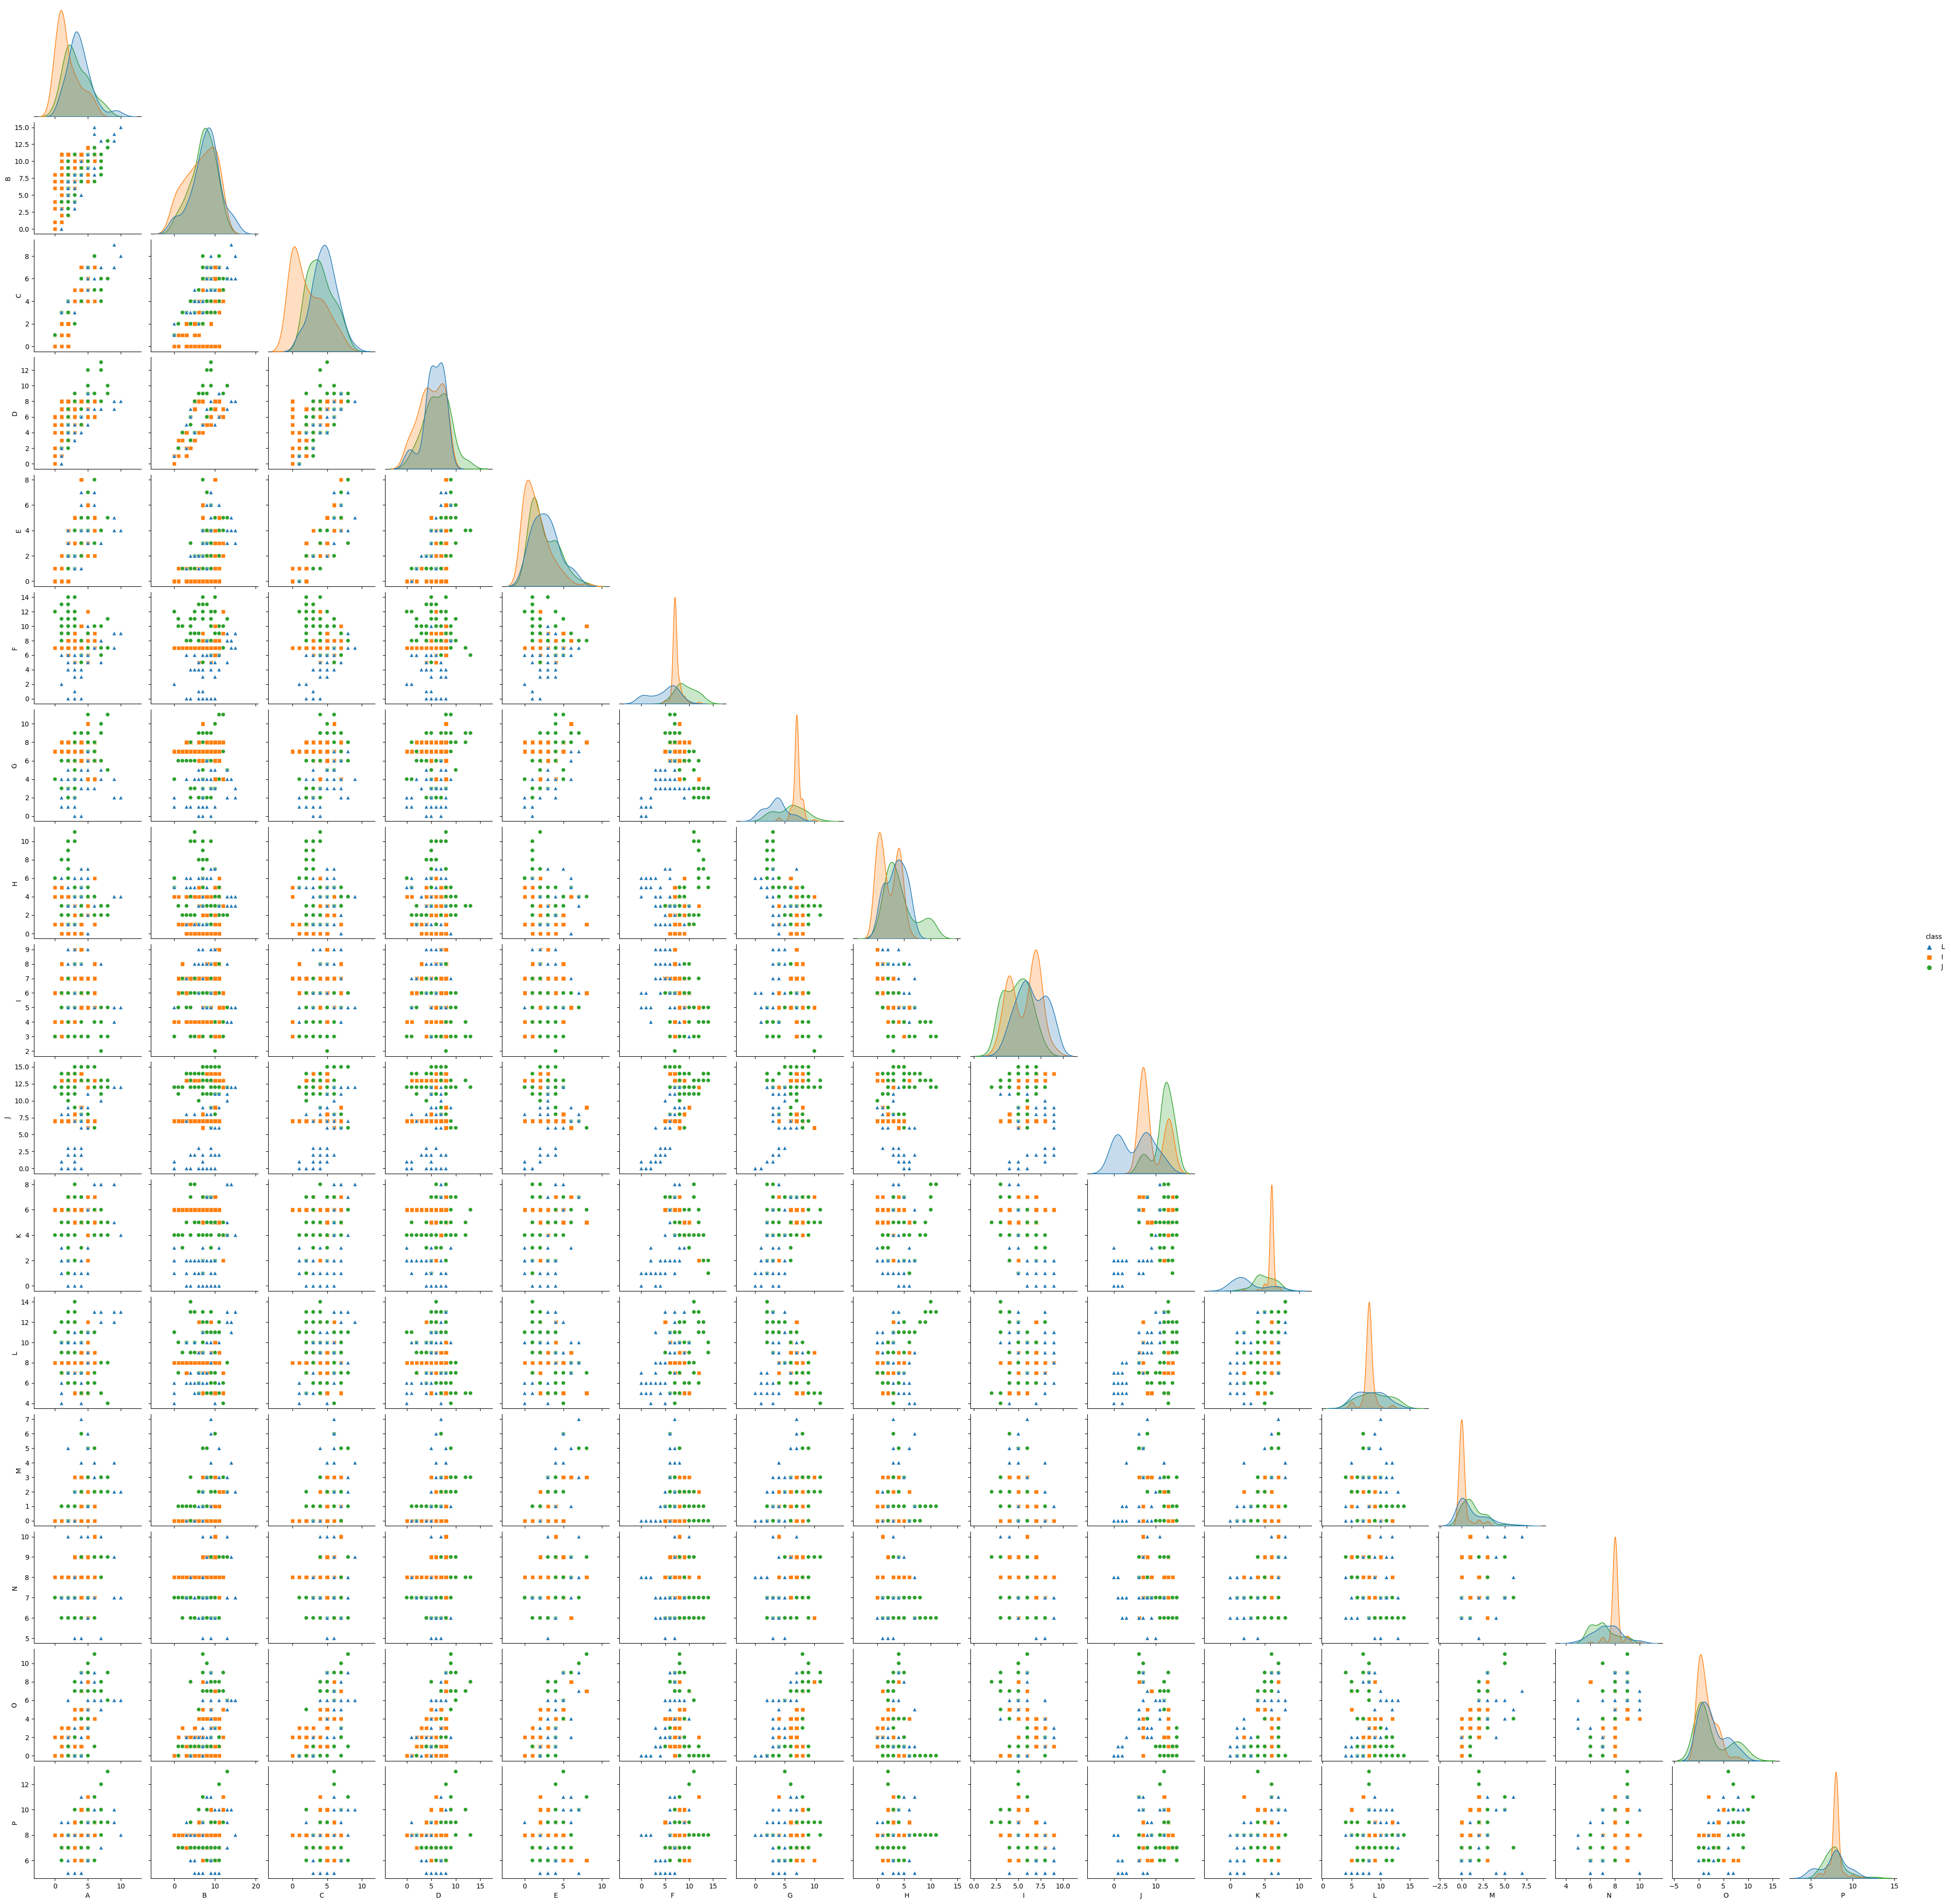

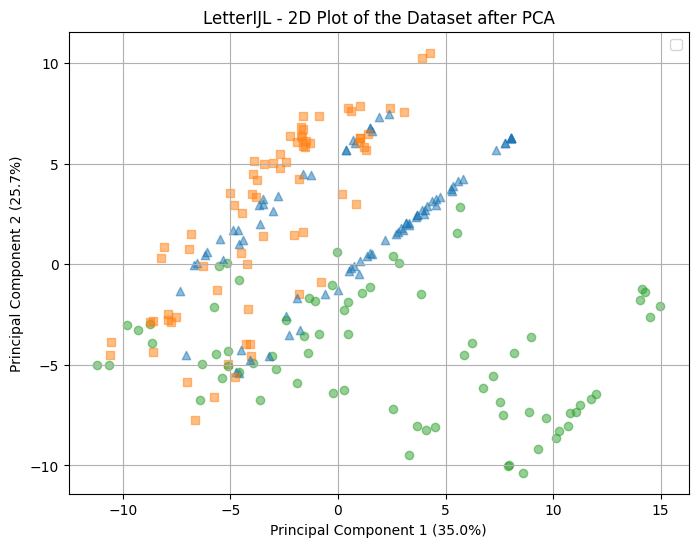

In [10]:
# fetch dataset
df = load_letters()

# data (as pandas dataframes)
y = pd.DataFrame(df.iloc[:, -1])
X = df.iloc[:, :-1]

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's', 'o']
plotting(X, y, "LetterIJL", matrix_plot=True, markers=markers)

# Normalization
scaler = MinMaxScaler((0,1))
X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

[1, 36.92964638719912]
[2, 36.189464241678856]
[3, 36.03882111940572]
[4, 35.9660174398098]
[5, 35.919167971957464]
[6, 35.8842717518692]
[7, 35.856348020783415]
[8, 35.83328762216344]
[9, 35.8140362394008]
[10, 35.79796234171132]
[11, 35.78461412407808]
[12, 35.77362168814776]
[13, 35.76465815935489]
[14, 35.75742566854168]
[15, 35.75165175344883]
[16, 35.747089749890684]
[17, 35.743520179151204]
[18, 35.74075171147579]
[19, 35.73862110403906]
[20, 35.736991997591595]
[21, 35.73575274663035]
[22, 35.73481359982617]
[ 0.        35.7348136 35.7348136]
[1, 36.929646387199114]
[2, 36.18946424167886]
[3, 36.03882111940572]
[4, 35.9660174398098]
[5, 35.919167971957464]
[6, 35.8842717518692]
[7, 35.856348020783415]
[8, 35.83328762216343]
[9, 35.81403623940079]
[10, 35.79796234171132]
[11, 35.78461412407808]
[12, 35.77362168814776]
[13, 35.76465815935489]
[14, 35.75742566854168]
[15, 35.751651753448826]
[16, 35.74708974989069]
[17, 35.7435201791512]
[18, 35.740751711475795]
[19, 35.7386211040

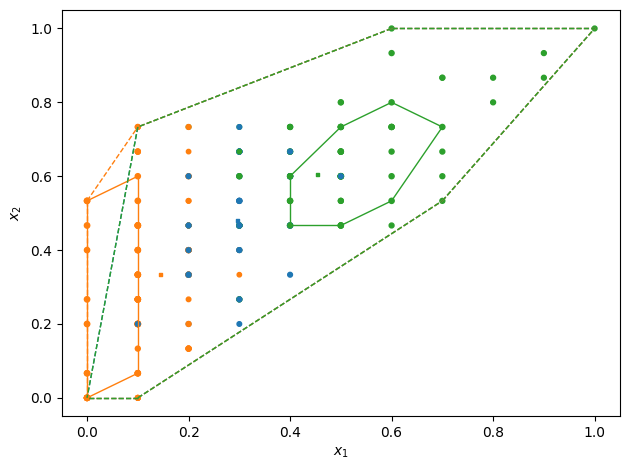

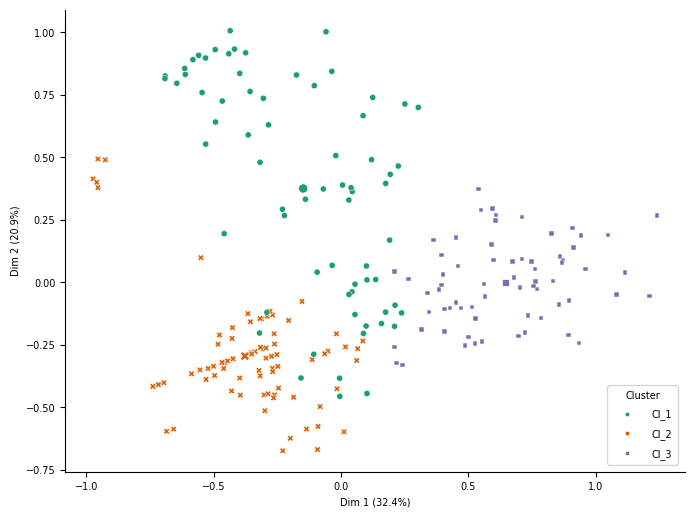

In [6]:
# Traditional ECM clustering
delta = np.sqrt(20)
model = ecm(x=X, c=3, beta=2, alpha=1, delta=delta, ntrials=5)

# Compute the Adjusted Rand Index (ARI)
true_labels = numeric_labels
Y_betP = model['betp']
predicted_labels = np.argmax(Y_betP, axis=1)

ari = adjusted_rand_score(true_labels, predicted_labels)
print("----------Traditional ECM----------")
print(f"Jbest: {model['crit']}")
print(f"Centers: \n {model['g']}")

print(f"Adjusted Rand Index (ARI): {ari}")

# Calculate Non-specificity
calculate_non_specificity(model)


ev_plot(model, X=X, cex=20)
ev_pcaplot(data=X, x=model, normalize=False, cex=20)

## Weighted ECM (WECM)

In [7]:
# Feature weighted ECM clustering
# W = np.array([
#     [0.23731218, 0.00201435, 0.00845606, 0.00249785, 0.08287942, 0.00090831
#         , 0.21169361, 0.01813973, 0.04081386, 0.01734401, 0.0298898, 0.00857061
#         , 0.14971047, 0.11276143, 0.03839339, 0.0386149],
#     [0.04391228, 0.11850017, 0.05077942, 0.02045962, 0.06347784, 0.02595456
#         , 0.08516361, 0.05943297, 0.01756978, 0.00248841, 0.03147024, 0.06915531
#         , 0.02343275, 0.03810224, 0.12668575, 0.22341505],
#     [0.04575623, 0.00212441, 0.13004581, 0.04100444, 0.01635153, 0.0098527
#         , 0.03222102, 0.02309984, 0.08945624, 0.10159646, 0.05957063, 0.00070901
#         , 0.05253759, 0.06376935, 0.03617661, 0.29572811]
# ])
model_list = np.array([])
for i in range(30):
    c = 3
    delta = np.sqrt(20)
    model = wecm(x=X, c=c, W=None, beta=2, alpha=1, delta=delta, epsi=1e-3, ntrials=10)
    model_list = np.append(model_list, model)

# Get best 10 models with minimum values
num = 10
model_list = sorted(model_list, key=lambda x : x['crit'])
print([x['crit'] for x in model_list])
top_weights = [model['W'] for model in model_list[:num]]

# Get ARI values of top 10
true_labels = numeric_labels
predicted_labels_list = [np.argmax(model['betp'], axis=1) for model in model_list[:num]]
top_aris = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]
print(f"ARIs: {top_aris}")

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list[:num]]
print(f"Non-specificities: {top_NS}")

Initial weights: 
 [[0.03889917 0.08925762 0.03359469 0.08974881 0.27072764 0.00378051
  0.05616911 0.01409543 0.05128356 0.05170279 0.04281347 0.02240561
  0.10507058 0.02579296 0.02654557 0.07811246]
 [0.0022064  0.0875356  0.02175393 0.01592996 0.24523309 0.02932845
  0.00064085 0.06709104 0.08863191 0.03589201 0.0482676  0.13308906
  0.07907416 0.02646433 0.06454458 0.05431704]
 [0.20805464 0.01104645 0.06404126 0.02508575 0.22046319 0.02211702
  0.01255632 0.06457317 0.15324878 0.0308699  0.00578901 0.02952358
  0.00356146 0.02353866 0.03796096 0.08756987]]
---------Iteration #1---------
Initial prototypes: 
 [[0.15929204 0.38171091 0.2359882  0.34989789 0.14159292 0.59734513
  0.5543041  0.29042639 0.49051833 0.70324484 0.68141593 0.49380531
  0.03286979 0.47433628 0.06838294 0.34181416]
 [0.294      0.436      0.44       0.39076923 0.24       0.25428571
  0.24727273 0.32363636 0.72285714 0.22533333 0.1575     0.338
  0.04571429 0.42       0.10909091 0.2725    ]
 [0.5296875  0.65

----------Weighted ECM----------
Jbest: 0.13545364124245565
Centers: 
[[0.12630797 0.35001454 0.15806773 0.32201389 0.11092914 0.5096963
  0.62103329 0.24895638 0.46688688 0.57412929 0.7185638  0.40421394
  0.02872879 0.58231994 0.09097785 0.35391518]
 [0.27195649 0.44377305 0.40375283 0.40203753 0.21265581 0.44846292
  0.31222838 0.34905256 0.60178135 0.51135919 0.32639452 0.45139719
  0.05442806 0.38896436 0.08639453 0.31390554]
 [0.50084357 0.62544483 0.64215955 0.57824693 0.54972556 0.54984241
  0.5797419  0.30293104 0.48902412 0.61732724 0.68596309 0.45036312
  0.3518488  0.55316873 0.51779108 0.42677814]]
Weights: 
[[0.04318587 0.03343216 0.05125011 0.06234355 0.03773637 0.08442538
  0.07381205 0.0446992  0.03802905 0.03538886 0.09377132 0.09743036
  0.04472478 0.15427674 0.06801042 0.03748377]
 [0.05837738 0.06110474 0.10572329 0.05501149 0.06963993 0.03770613
  0.03195299 0.03065219 0.07181365 0.03014858 0.03239759 0.04829776
  0.07993988 0.05878156 0.10127991 0.12717294]
 [0.0

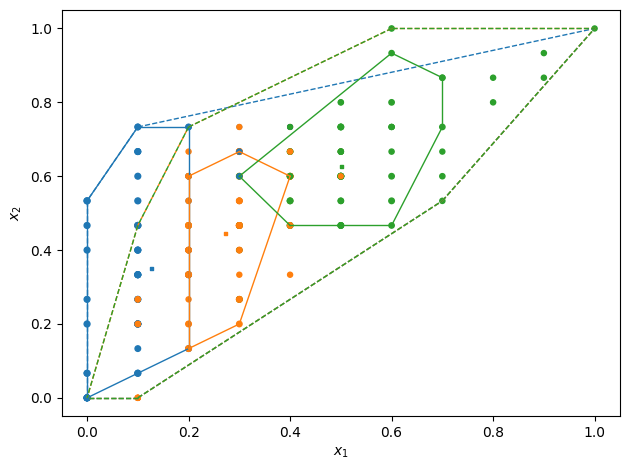

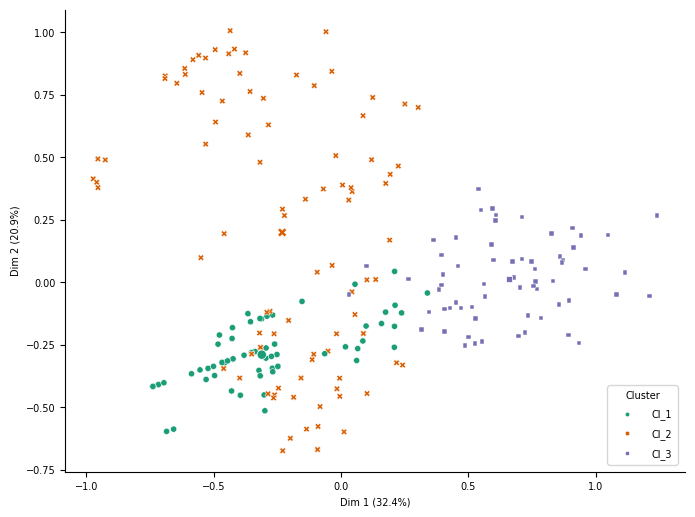

In [11]:
best_model = model_list[0]
print("----------Weighted ECM----------")
print(f"Jbest: {best_model['crit']}")
print(f"Centers: \n{best_model['g']}")
print(f"Weights: \n{best_model['W']}")
print(f"Adjusted Rand Index (ARI) of the best J: {top_aris[0]}")
print(f"Average ARI: {np.mean(top_aris)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")

# Plotting PCA of the best model
ev_plot(best_model, X=X, cex=20)
ev_pcaplot(data=X, x=best_model, normalize=False, cex=20)

In [9]:
for W in top_weights:
    print(f"\n{W}")


[[0.04318587 0.03343216 0.05125011 0.06234355 0.03773637 0.08442538
  0.07381205 0.0446992  0.03802905 0.03538886 0.09377132 0.09743036
  0.04472478 0.15427674 0.06801042 0.03748377]
 [0.05837738 0.06110474 0.10572329 0.05501149 0.06963993 0.03770613
  0.03195299 0.03065219 0.07181365 0.03014858 0.03239759 0.04829776
  0.07993988 0.05878156 0.10127991 0.12717294]
 [0.04769204 0.0513838  0.10471502 0.04423402 0.03708283 0.06348755
  0.09202525 0.08132085 0.08613924 0.08160894 0.0691394  0.0309153
  0.04468787 0.05655477 0.03590559 0.07310753]]

[[0.13219766 0.05081062 0.08099582 0.0986981  0.05937975 0.04162607
  0.05583404 0.04109153 0.04296165 0.04142232 0.05666147 0.06776912
  0.04306064 0.07853927 0.04458611 0.06436582]
 [0.04413403 0.045418   0.0555747  0.07861678 0.10565709 0.06335501
  0.06382282 0.04359297 0.04772713 0.05107663 0.06322636 0.06713084
  0.05664844 0.04273276 0.11730927 0.05397717]
 [0.07205968 0.06370153 0.04262893 0.07306488 0.05012991 0.04499493
  0.09738287 0.